In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from skimage.io import imread

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
# Define path to the data directory
data_dir = Path('/content/drive/MyDrive/2nd Sem/MDS272B - Image and Video Analytics/Project/chest_xray')

# Path to train directory
train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

In [11]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1
1,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,0
2,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,0
3,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1
4,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1


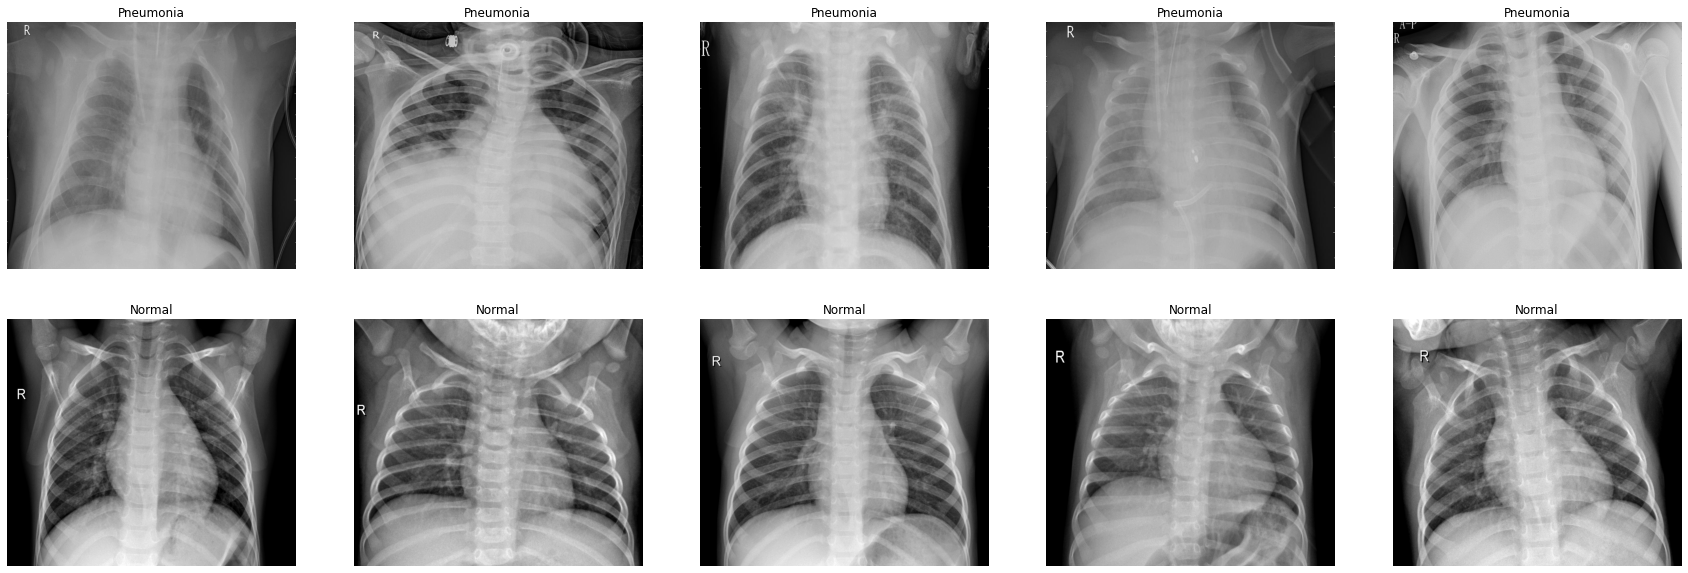

In [12]:
# Get few samples for both the classes
pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
_, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [14]:
sizes = []
for imgPath in train_data['image']:
    img = imread(imgPath)
    size = img.shape
    sizes.append(size)

train_data['size'] = sizes
train_data

,image,label,size
0,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(728, 1192)"
1,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,0,"(1480, 1882)"
2,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,0,"(1051, 1300)"
3,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(1544, 1552)"
4,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(784, 1160)"
...,...,...,...
5211,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(576, 1040)"
5212,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(984, 1208)"
5213,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(586, 923, 3)"
5214,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(458, 732, 3)"


In [25]:
ratios = []
for size in train_data['size']:
  ratio = size[1] / size[0]
  ratios.append(ratio)

train_data['ratio'] = ratios
train_data

,image,label,size,ratio
0,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(728, 1192)",1.637363
1,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,0,"(1480, 1882)",1.271622
2,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,0,"(1051, 1300)",1.236917
3,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(1544, 1552)",1.005181
4,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(784, 1160)",1.479592
...,...,...,...,...
5211,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(576, 1040)",1.805556
5212,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(984, 1208)",1.227642
5213,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(586, 923, 3)",1.575085
5214,/content/drive/MyDrive/2nd Sem/MDS272B - Image...,1,"(458, 732, 3)",1.598253
